##  SVM

1. Module and Environment set up
2. Data import and understanding
3. Missing value treatment
4. Feature transformation
5. SVM modelling and validation with different parameters

### Module and Environment

In [102]:
# Import Libraries required for the experiment
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,RobustScaler,StandardScaler
import random
import os
import warnings
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
from sklearn import tree
import collections
np.random.seed(132)

In [103]:
import sklearn
sklearn.__version__

'0.22.1'

In [104]:
# Initiate Encoders which will be used for Categorical Variables
label_encoder = LabelEncoder()

# Prints all line without skipping
pd.set_option('display.max_rows', None)
# Prints all columns without skipping
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


In [105]:
os.getcwd()

'C:\\Users\\ankit\\Teaching with Vijay\\SVM'

### Data Snapshot

In [106]:
# load the raw input dataset
bookings=pd.read_csv('C:\\Users\\ankit\\Teaching with Vijay\\SVM\\hotel_bookings.csv')
bookings.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03-07-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,03-07-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,03-07-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,03-07-2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,06-05-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,22-04-2015


In [107]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
bookings.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,21-10-2015
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN


In [108]:
bookings.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type            

In [109]:
#Assign Temporary Storage of the core dataset (For larger sets this step must be avoided)
temp = bookings.copy()

In [110]:
temp.columns[[3,5,6,13,22,23,29]]

Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'country', 'agent', 'company',
       'reservation_status_date'],
      dtype='object')

In [111]:
temp=temp.drop(temp.columns[[3,5,6,13,22,23,29]],axis=1)


### Missing Value Treatment

In [112]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]

# Identify Categorical Variables manually
temp1=temp.head()
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]] = temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].astype(str)


In [113]:
temp1.iloc[:,[0,1,3,4,5,10,11,12,13,16,17,19,21]].head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,customer_type,required_car_parking_spaces
0,Resort Hotel,0,July,0,0,Direct,Direct,0,0,3,No Deposit,Transient,0
1,Resort Hotel,0,July,0,0,Direct,Direct,0,0,4,No Deposit,Transient,0
2,Resort Hotel,0,July,0,1,Direct,Direct,0,0,0,No Deposit,Transient,0
3,Resort Hotel,0,July,0,1,Corporate,Corporate,0,0,0,No Deposit,Transient,0
4,Resort Hotel,0,July,0,2,Online TA,TA/TO,0,0,0,No Deposit,Transient,0


In [114]:
print(null_columns)

Index(['children'], dtype='object')


In [115]:
categoric_variables = temp1.columns[temp1.dtypes=='object']

# Categorical Imputation
for i in range(0,len(categoric_variables)):
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(np.nan,temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="NaN", value = temp[categoric_variables[i]].mode()[0])
    temp[categoric_variables[i]]=temp[categoric_variables[i]].replace(to_replace ="nan", value = temp[categoric_variables[i]].mode()[0])

    # Numeric Imputation
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy="mean")

# Mean Imputation for Numeric Variables
numeric_variables = set(temp.columns) - set(categoric_variables)
i=1
for i in range(0,len(numeric_variables)):
    if(temp.columns[i] in numeric_variables):
       temp.iloc[:,[i]] = mean_imp.fit_transform(temp.iloc[:,[i]])
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="NaN",value =0)
       temp[temp.columns[i]]=temp[temp.columns[i]].replace(to_replace ="nan",value =0)
       temp[temp.columns[i]].fillna(0, inplace = True) 


In [116]:
# Retrieve Columns that have Null Value 
null_columns=temp.columns[temp.isnull().any()]
null_columns

Index([], dtype='object')

In [117]:
# Converting into string
temp['hotel'] = temp['hotel'].astype(str)
temp['arrival_date_month'] = temp['arrival_date_month'].astype(str)
temp['meal'] = temp['meal'].astype(str)
temp['market_segment'] = temp['market_segment'].astype(str)
temp['distribution_channel'] = temp['distribution_channel'].astype(str)
   
temp['is_repeated_guest'] = temp['is_repeated_guest'].astype(str)
temp['reserved_room_type'] = temp['reserved_room_type'].astype(str)
temp['deposit_type'] = temp['deposit_type'].astype(str)
temp['customer_type'] = temp['customer_type'].astype(str)
temp['is_canceled'] = temp['is_canceled'].astype(str)


## EDA

In [118]:
num_data = temp[temp.columns[temp.dtypes!='object']]
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342.0,0,0,2.0,0.0,0,0,0,3,0,0.0,0,0
1,737.0,0,0,2.0,0.0,0,0,0,4,0,0.0,0,0
2,7.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
3,13.0,0,1,1.0,0.0,0,0,0,0,0,75.0,0,0
4,14.0,0,2,2.0,0.0,0,0,0,0,0,98.0,0,1


### Feature Transformation

In [119]:
# Plotting All the Variables that are available in raw file
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\SVM\\')
if not os.path.exists('Plots'):
    os.makedirs('Plots')
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\SVM\\')


lead_time
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests


<Figure size 842.4x595.44 with 0 Axes>

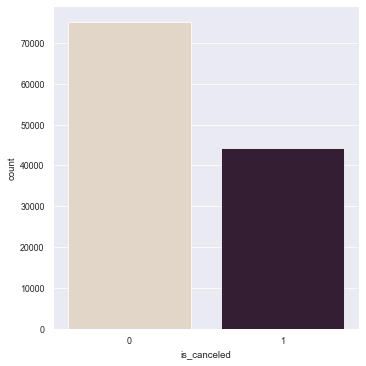

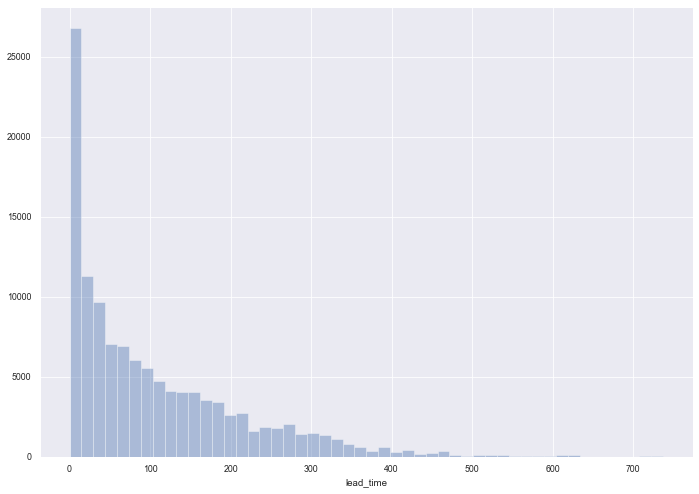

<Figure size 842.4x595.44 with 0 Axes>

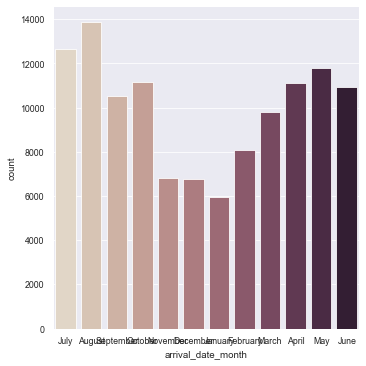

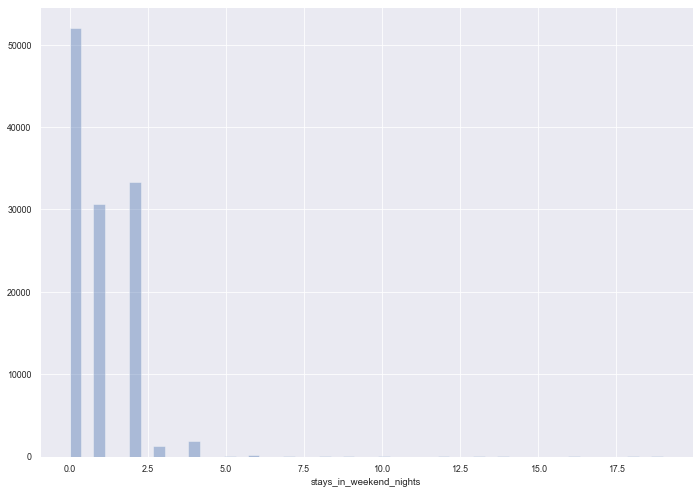

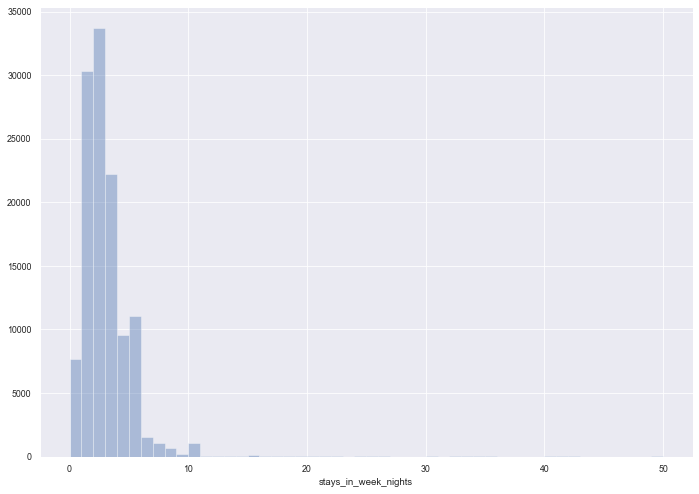

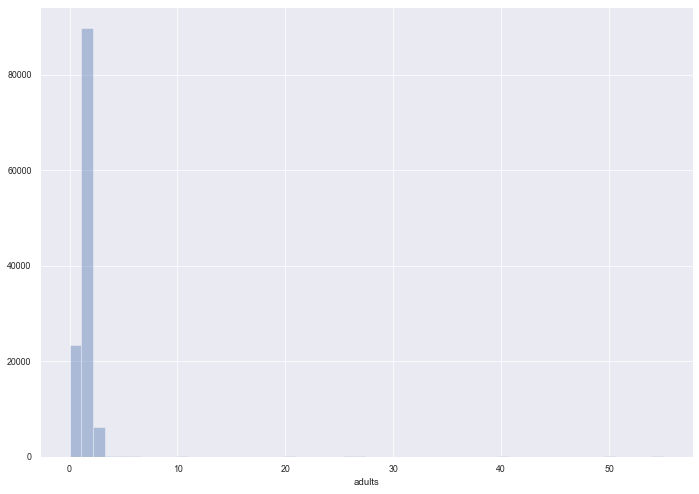

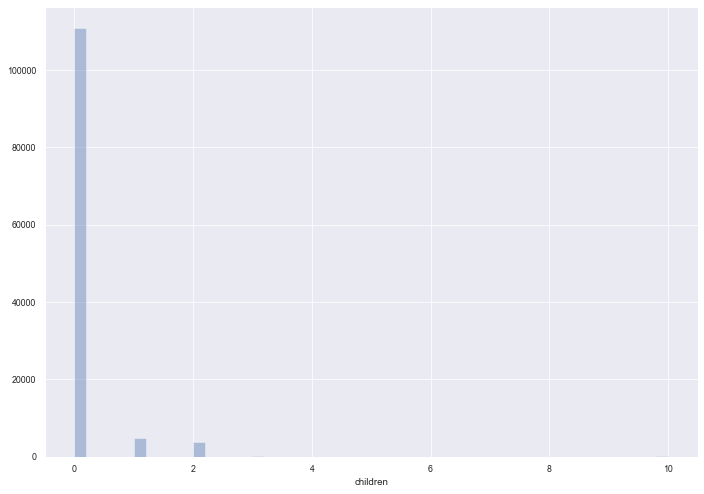

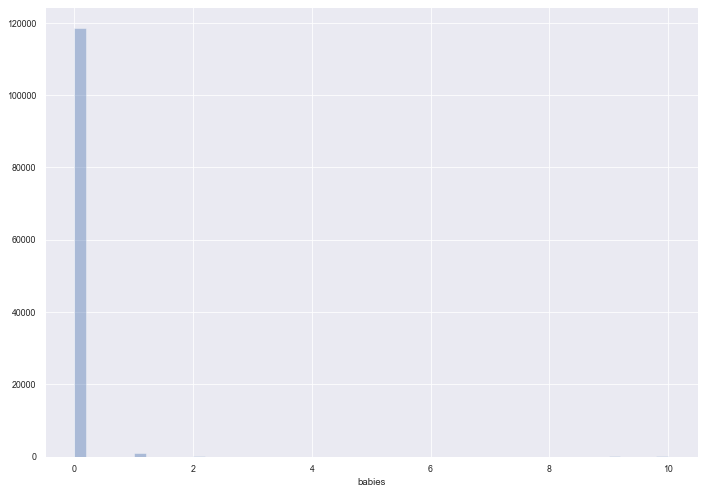

<Figure size 842.4x595.44 with 0 Axes>

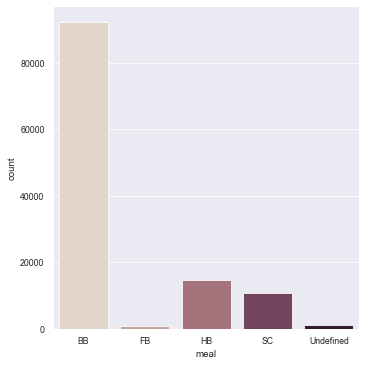

<Figure size 842.4x595.44 with 0 Axes>

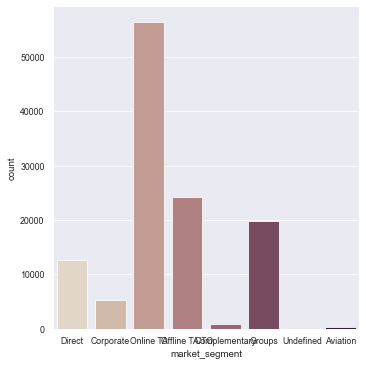

<Figure size 842.4x595.44 with 0 Axes>

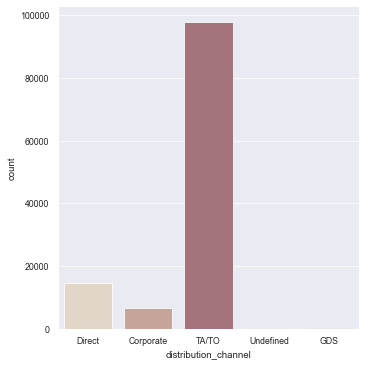

<Figure size 842.4x595.44 with 0 Axes>

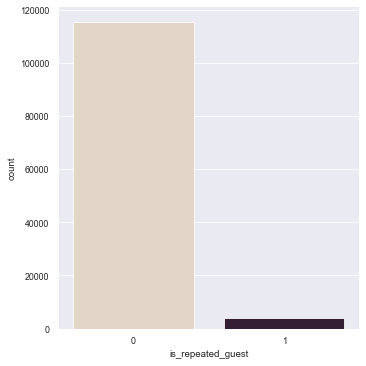

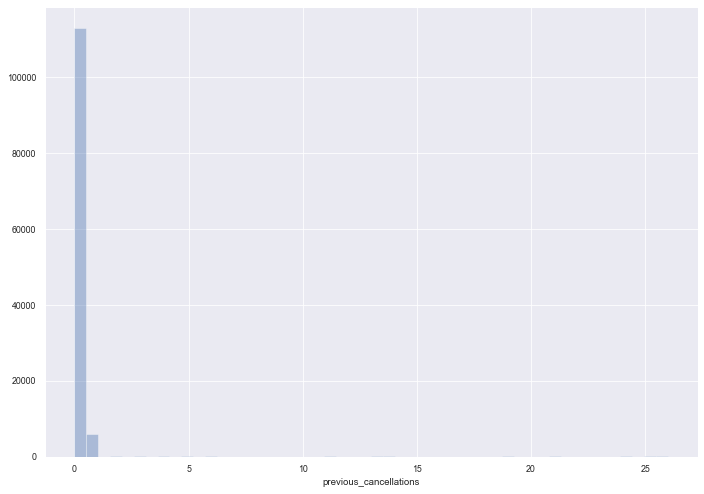

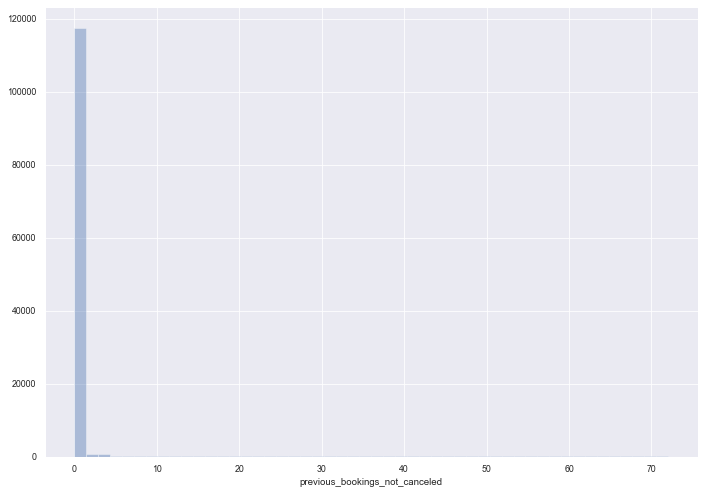

<Figure size 842.4x595.44 with 0 Axes>

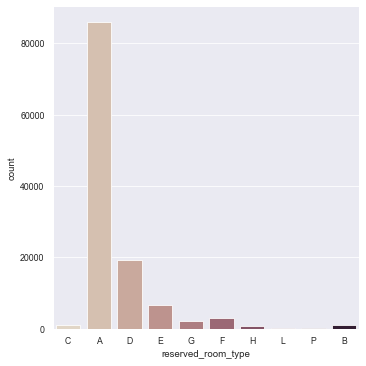

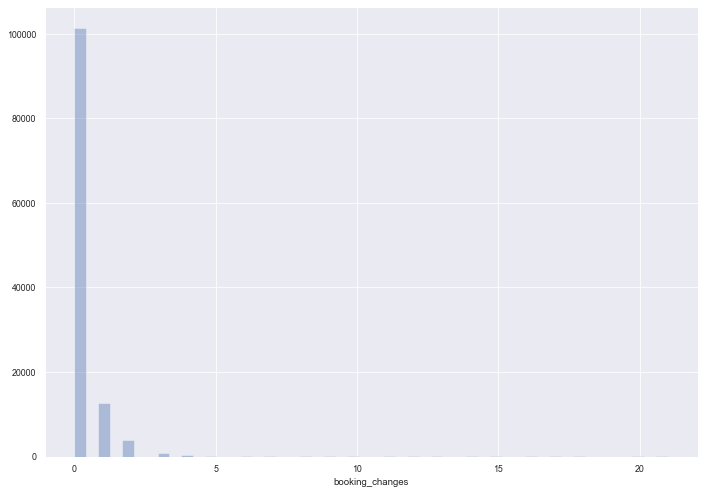

<Figure size 842.4x595.44 with 0 Axes>

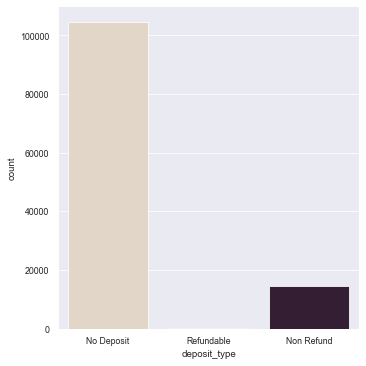

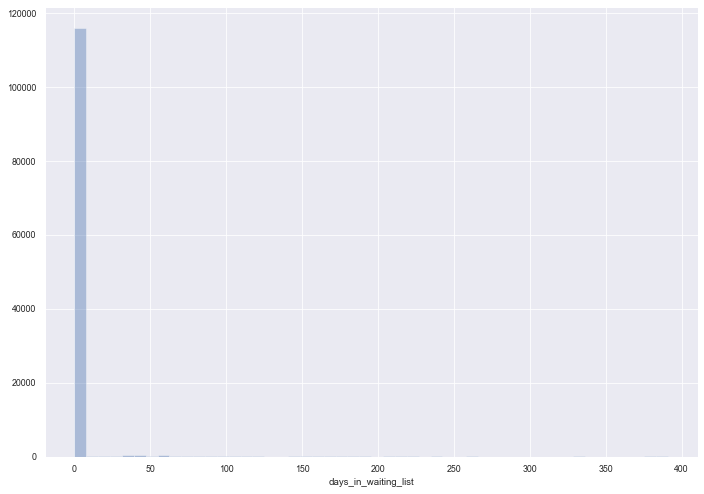

<Figure size 842.4x595.44 with 0 Axes>

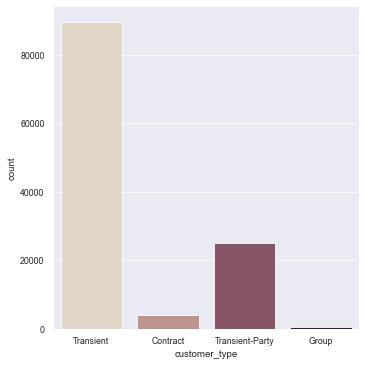

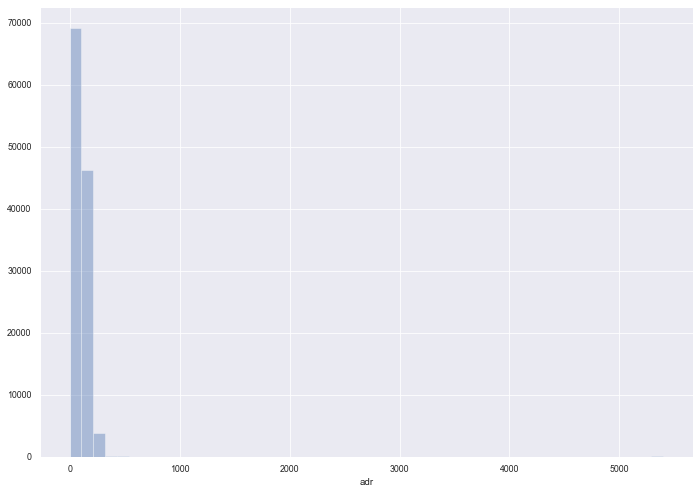

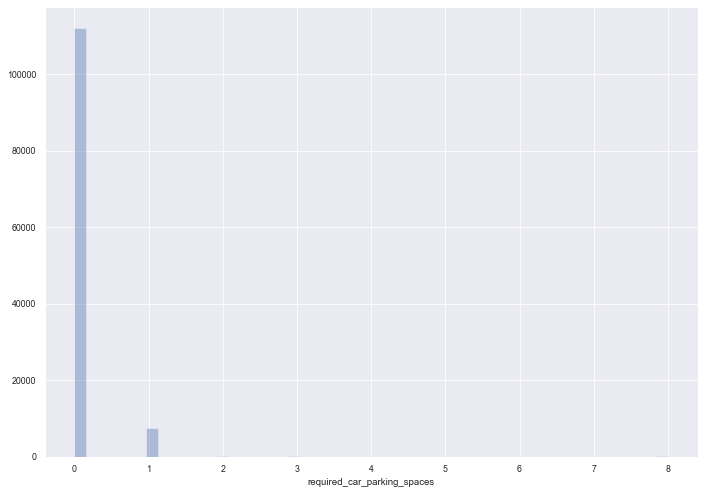

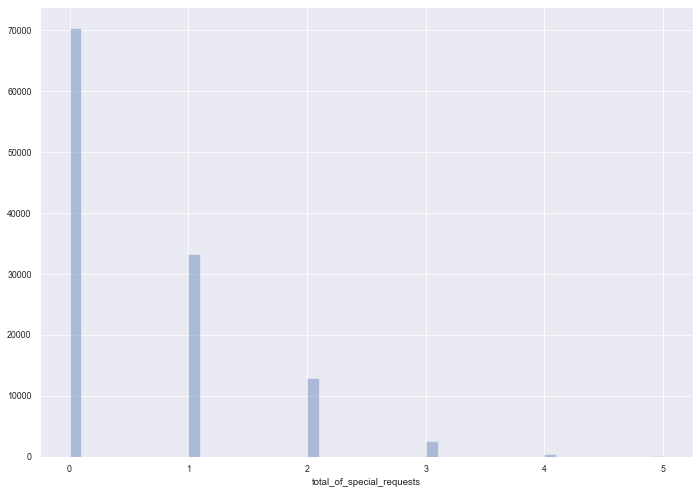

In [120]:

for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        print(temp.columns[i])
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')
    else:
        plt.figure()
        sns_plot = sns.catplot(x=temp.columns[i], kind="count", palette="ch:.25", data=temp)
        sns_plot.savefig(temp.columns[i]+'.png')




In [121]:
# Plotting All the Transformed Variables 
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\SVM\\')
if not os.path.exists('Transformed Plots'):
    os.makedirs('Transformed Plots')
os.chdir('C:\\Users\\ankit\\Teaching with Vijay\\SVM\\')



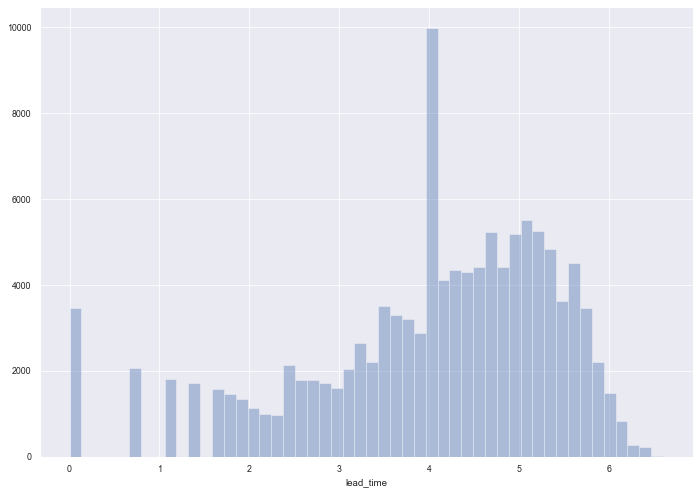

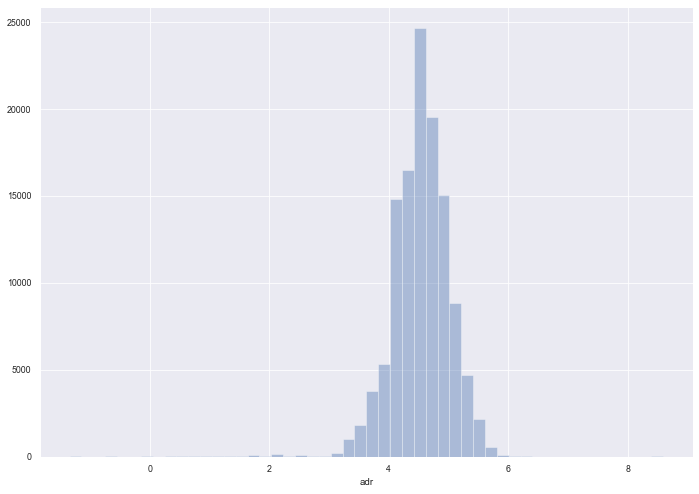

In [122]:
# Log transformation with mean Imputation for Non-Uniform Variables
log_mean_transform_var=['lead_time','adr']


import time
for i in range(0,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        logtransform=np.log(temp[temp.columns[i]])
        logtransform = logtransform.replace([np.inf, -np.inf], np.nan)
        logtransform = mean_imp.fit_transform(pd.DataFrame(logtransform))
        temp[temp.columns[i]]=logtransform
        temp[temp.columns[i]].fillna(0, inplace = True) 

for i in range(1,len(temp.columns)):
    if(temp.columns[i] in log_mean_transform_var):
        plt.figure()
        sns_plot = sns.distplot(temp[temp.columns[i]], kde=False)
        sns_plot.figure.savefig(temp.columns[i]+'.png')


### Feature Selection

#### Numerical feature selection

In [123]:
numeric_variables = num_data.columns
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [124]:
temp.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,3.994735,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,4.539002,0.062518,0.571363
std,1.429553,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,0.462198,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.347074,0.000000,0.000000
25%,3.295837,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.265914,0.000000,0.000000
50%,4.234107,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.549393,0.000000,0.000000
75%,5.075174,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.836282,0.000000,1.000000
max,6.602588,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,8.594154,8.000000,5.000000


In [125]:
# Create correlation matrix
corr_matrix = temp[numeric_variables].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7 & less than -0.7
to_drop_pos = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop_neg = [column for column in upper.columns if any(upper[column] < -0.7)]
print(to_drop_neg)
print(to_drop_pos)

[]
[]


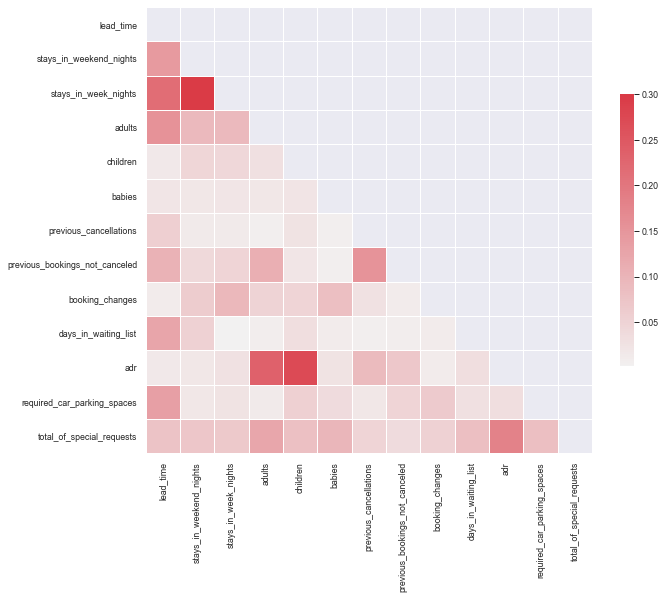

In [126]:
plt.figure(figsize=(10,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns_plot.figure.savefig('correlation.png')
# Fill na values with Numeric value as 0
for i in range(1,len(temp.columns)):
    if(temp.dtypes[i] in ('float64','int64')):
        temp[temp.columns[i]].fillna(0, inplace = True) 


In [127]:
# Drop NaN Value from the temp variable
        
temp=temp.dropna(how='any') 

X = temp.drop(temp.columns[1],axis=1)
y = temp[temp.columns[1]]
y =np.where(y =='0',0,1)
# Identify Numeric Values separately
#num_only=set(numeric_variables).difference(categoric_variables)

In [128]:
numeric_variables

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [129]:

# Decision tree with gini 
dt_model_num = DecisionTreeClassifier() 
  
# Performing training 
dt_model_num.fit(X[numeric_variables], y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
print(dt_model_num.feature_importances_)

[0.31377605 0.04705926 0.08419545 0.02802842 0.01361105 0.00163069
 0.07693982 0.01695888 0.04333481 0.0101143  0.27552245 0.0229107
 0.06591812]


In [131]:
dt_p_values_num = pd.Series(dt_model_num.feature_importances_,index = X[numeric_variables].columns)
dt_p_values_num.sort_values(ascending = False , inplace = True)
dt_p_values_num

lead_time                         0.313776
adr                               0.275522
stays_in_week_nights              0.084195
previous_cancellations            0.076940
total_of_special_requests         0.065918
stays_in_weekend_nights           0.047059
booking_changes                   0.043335
adults                            0.028028
required_car_parking_spaces       0.022911
previous_bookings_not_canceled    0.016959
children                          0.013611
days_in_waiting_list              0.010114
babies                            0.001631
dtype: float64

{'babies'}


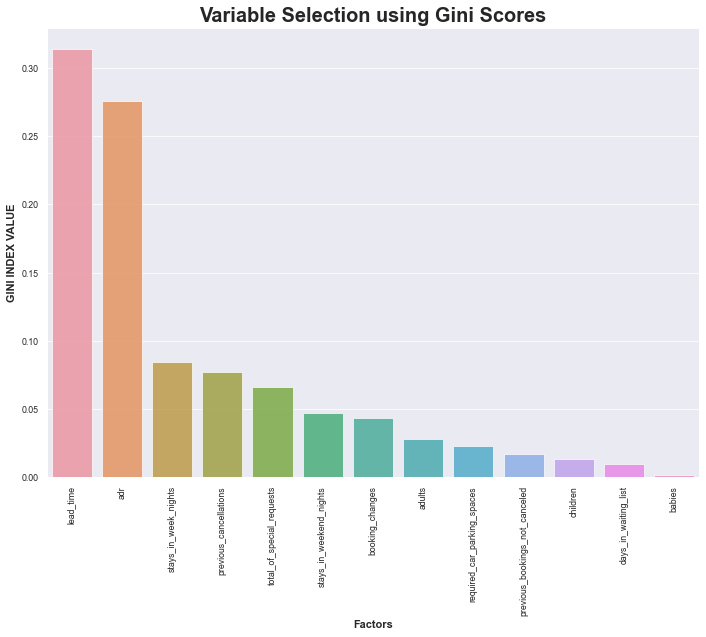

In [132]:

plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_num.index[dt_p_values_num>0],dt_p_values_num[dt_p_values_num>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 11, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 11, weight = 'bold')
sns_plot.set_title("Variable Selection using Gini Scores", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('GINI_INDEX'+'.png')

dt_selected_num=dt_p_values_num.index[dt_p_values_num>0.01]
dt_rejected_num=set(X[numeric_variables].columns.values).difference(dt_selected_num)
print(dt_rejected_num)

#### categorical feature selection

list of categorical variables to be dropped Index([], dtype='object')


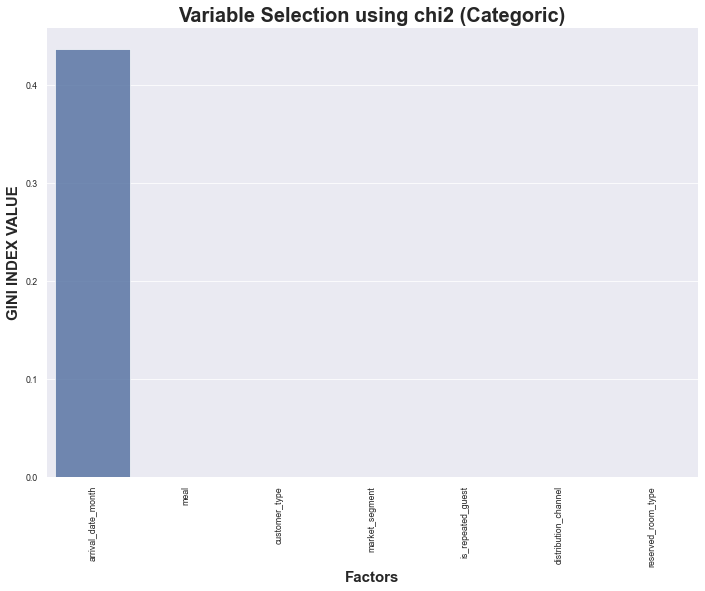

In [133]:
#temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]] = temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]].astype('str')

# Selecting Categorical Variables alone for Variable Selection
t=temp.iloc[:,[0,1,3,9,10,11,12,15,17,19]]
# Dropping off NaN Values if Any
t=t.dropna(how='any')
del t['is_canceled']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(0,len(t.columns)):
    t.iloc[:,i] = le.fit_transform(t.iloc[:,i])
    
from sklearn.feature_selection import chi2
Stats,Pvalue = chi2(t,y)
dt_p_values_cat = pd.Series(Pvalue,index = t.columns)
dt_p_values_cat.sort_values(ascending = False , inplace = True)
plt.figure()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d")
sns.set_context("paper")
sns_plot = sns.barplot(dt_p_values_cat.index[dt_p_values_cat>0],dt_p_values_cat[dt_p_values_cat>0],alpha = 0.85)
plt.xticks(rotation=90)
plt.xlabel('Factors', fontsize = 15, weight = 'bold')
plt.ylabel('GINI INDEX VALUE', fontsize = 15, weight = 'bold')
sns_plot.set_title("Variable Selection using chi2 (Categoric)", fontsize = 20, weight = 'bold')
sns_plot.figure.savefig('chi2'+'.png')

dt_selected_cat=dt_p_values_cat.index[:10]
dt_rejected_cat=dt_p_values_cat.index[10:]
print("list of categorical variables to be dropped", dt_rejected_cat)


In [134]:
rejected_variables=[]
rejected_variables.extend(to_drop_pos)
rejected_variables.extend(to_drop_neg)
rejected_variables.extend(dt_rejected_num)
rejected_variables.extend(dt_rejected_cat)


In [135]:
rejected_variables

['babies']

In [ ]:
type(temp)

In [136]:
print(set(temp.columns).difference(rejected_variables))

final_selection=set(temp.columns).difference(rejected_variables)
final_selection.remove('is_canceled')

#cat_vars=set(set(final_selection).difference(rejected_variables_filter)).difference(numeric_variables)
#cat_vars1=cat_vars
#final_selection=set(final_selection).difference(cat_vars1)


{'stays_in_weekend_nights', 'customer_type', 'reserved_room_type', 'is_canceled', 'meal', 'is_repeated_guest', 'adults', 'deposit_type', 'hotel', 'total_of_special_requests', 'days_in_waiting_list', 'previous_cancellations', 'stays_in_week_nights', 'previous_bookings_not_canceled', 'adr', 'lead_time', 'arrival_date_month', 'required_car_parking_spaces', 'market_segment', 'distribution_channel', 'booking_changes', 'children'}


In [137]:
temp[final_selection].head()

,stays_in_weekend_nights,customer_type,reserved_room_type,meal,is_repeated_guest,adults,deposit_type,hotel,total_of_special_requests,days_in_waiting_list,previous_cancellations,stays_in_week_nights,previous_bookings_not_canceled,adr,lead_time,arrival_date_month,required_car_parking_spaces,market_segment,distribution_channel,booking_changes,children
0,0,Transient,C,BB,0,2.0,No Deposit,Resort Hotel,0,0,0,0,0,4.539002,5.834811,July,0,Direct,Direct,3,0.0
1,0,Transient,C,BB,0,2.0,No Deposit,Resort Hotel,0,0,0,0,0,4.539002,6.602588,July,0,Direct,Direct,4,0.0
2,0,Transient,A,BB,0,1.0,No Deposit,Resort Hotel,0,0,0,1,0,4.317488,1.945910,July,0,Direct,Direct,0,0.0
3,0,Transient,A,BB,0,1.0,No Deposit,Resort Hotel,0,0,0,1,0,4.317488,2.564949,July,0,Corporate,Corporate,0,0.0
4,0,Transient,A,BB,0,2.0,No Deposit,Resort Hotel,1,0,0,2,0,4.584967,2.639057,July,0,Online TA,TA/TO,0,0.0


In [138]:
temp[final_selection].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   stays_in_weekend_nights         119390 non-null  int64  
 1   customer_type                   119390 non-null  object 
 2   reserved_room_type              119390 non-null  object 
 3   meal                            119390 non-null  object 
 4   is_repeated_guest               119390 non-null  object 
 5   adults                          119390 non-null  float64
 6   deposit_type                    119390 non-null  object 
 7   hotel                           119390 non-null  object 
 8   total_of_special_requests       119390 non-null  int64  
 9   days_in_waiting_list            119390 non-null  int64  
 10  previous_cancellations          119390 non-null  int64  
 11  stays_in_week_nights            119390 non-null  int64  
 12  previous_booking

#### One Hot Encoding

In [139]:
num_data = temp[temp.columns[temp.dtypes!='object']]
cat_data = temp[temp.columns[temp.dtypes=='object']]
del cat_data['is_canceled']

In [140]:
num_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,4.539002,0,0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,4.539002,0,0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,4.584967,0,1


In [141]:
cat_data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
1,Resort Hotel,July,BB,Direct,Direct,0,C,No Deposit,Transient
2,Resort Hotel,July,BB,Direct,Direct,0,A,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,Corporate,0,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,TA/TO,0,A,No Deposit,Transient


In [142]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)
dummydata = enc.fit_transform(cat_data)
dummydata = pd.DataFrame(dummydata)
names = enc.get_feature_names(input_features=list(cat_data.columns))
dummydata.columns = names
dummydata.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [143]:
dummydata=dummydata.reset_index(drop=True)
num_data=num_data.reset_index(drop=True)
X_log=pd.concat([num_data,dummydata], axis=1)


In [144]:
X_log.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,5.834811,0,0,2.0,0.0,0,0,0,3,0,4.539002,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.602588,0,0,2.0,0.0,0,0,0,4,0,4.539002,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.945910,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.564949,0,1,1.0,0.0,0,0,0,0,0,4.317488,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.639057,0,2,2.0,0.0,0,0,0,0,0,4.584967,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Scaling

In [145]:
columns = X_log.columns

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_log = scaler.fit_transform(X_log)
X_log = pd.DataFrame(X_log, columns = columns)

In [147]:
X_log.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,is_repeated_guest_0,is_repeated_guest_1,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1.287174,-0.92889,-1.310240,0.247897,-0.260668,-0.081579,-0.10318,-0.091555,4.260101,-0.131924,0.000000,-0.254873,-0.720694,-1.407224,1.407224,-0.319985,-0.362656,-0.245373,-0.269211,-0.228595,2.903402,-0.317594,-0.298939,-0.331033,-0.245641,-0.321113,-0.310658,0.541627,-0.08203,-0.371266,-0.312954,-0.09944,-0.044599,-0.079135,-0.215427,2.910479,-0.446035,-0.504459,-0.947470,-0.004093,-0.243391,2.674373,-0.040239,-2.132572,-0.006472,0.18156,-0.18156,-1.604674,-0.097225,11.273902,-0.437776,-0.240637,-0.157697,-0.133612,-0.071129,-0.007089,-0.010026,0.375431,-0.373075,-0.036861,-0.188008,-0.069688,0.576441,-0.516258
1,1.824251,-0.92889,-1.310240,0.247897,-0.260668,-0.081579,-0.10318,-0.091555,5.793131,-0.131924,0.000000,-0.254873,-0.720694,-1.407224,1.407224,-0.319985,-0.362656,-0.245373,-0.269211,-0.228595,2.903402,-0.317594,-0.298939,-0.331033,-0.245641,-0.321113,-0.310658,0.541627,-0.08203,-0.371266,-0.312954,-0.09944,-0.044599,-0.079135,-0.215427,2.910479,-0.446035,-0.504459,-0.947470,-0.004093,-0.243391,2.674373,-0.040239,-2.132572,-0.006472,0.18156,-0.18156,-1.604674,-0.097225,11.273902,-0.437776,-0.240637,-0.157697,-0.133612,-0.071129,-0.007089,-0.010026,0.375431,-0.373075,-0.036861,-0.188008,-0.069688,0.576441,-0.516258
2,-1.433198,-0.92889,-0.786207,-1.478447,-0.260668,-0.081579,-0.10318,-0.091555,-0.338990,-0.131924,-0.479264,-0.254873,-0.720694,-1.407224,1.407224,-0.319985,-0.362656,-0.245373,-0.269211,-0.228595,2.903402,-0.317594,-0.298939,-0.331033,-0.245641,-0.321113,-0.310658,0.541627,-0.08203,-0.371266,-0.312954,-0.09944,-0.044599,-0.079135,-0.215427,2.910479,-0.446035,-0.504459,-0.947470,-0.004093,-0.243391,2.674373,-0.040239,-2.132572,-0.006472,0.18156,-0.18156,0.623179,-0.097225,-0.088700,-0.437776,-0.240637,-0.157697,-0.133612,-0.071129,-0.007089,-0.010026,0.375431,-0.373075,-0.036861,-0.188008,-0.069688,0.576441,-0.516258
3,-1.000167,-0.92889,-0.786207,-1.478447,-0.260668,-0.081579,-0.10318,-0.091555,-0.338990,-0.131924,-0.479264,-0.254873,-0.720694,-1.407224,1.407224,-0.319985,-0.362656,-0.245373,-0.269211,-0.228595,2.903402,-0.317594,-0.298939,-0.331033,-0.245641,-0.321113,-0.310658,0.541627,-0.08203,-0.371266,-0.312954,-0.09944,-0.044599,-0.079135,4.641949,-0.343586,-0.446035,-0.504459,-0.947470,-0.004093,4.108623,-0.373919,-0.040239,-2.132572,-0.006472,0.18156,-0.18156,0.623179,-0.097225,-0.088700,-0.437776,-0.240637,-0.157697,-0.133612,-0.071129,-0.007089,-0.010026,0.375431,-0.373075,-0.036861,-0.188008,-0.069688,0.576441,-0.516258
4,-0.948327,-0.92889,-0.262174,0.247897,-0.260668,-0.081579,-0.10318,-0.091555,-0.338990,-0.131924,0.099450,-0.

In [148]:
X_log.shape

(119390, 64)

### PCA

In [149]:
#Perform eigendecomposition on  matrix
cov_mat = X_log.corr()
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [150]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

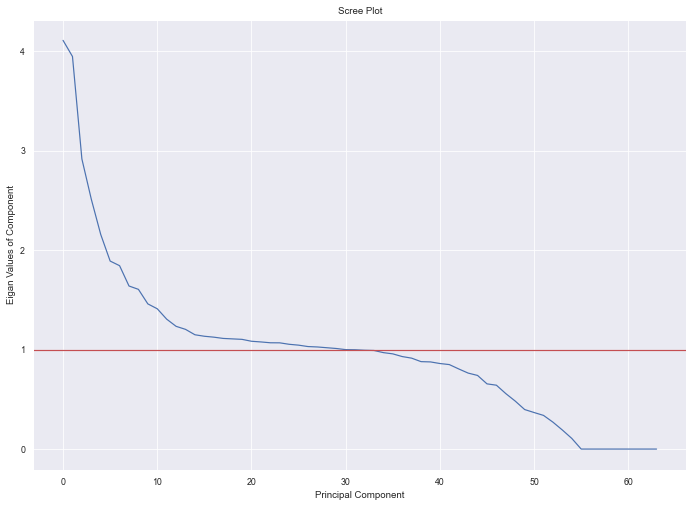

30

In [151]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
eig_vals = abs(np.sort(-eig_vals))
plt.plot(eig_vals)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigan Values of Component')
plt.axhline(y=1,color='r',linestyle='-')
plt.show()
(eig_vals>1).sum()

In [152]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=30) 

X1=pca.fit_transform(X_log)
X1 = pd.DataFrame(X1)

columns = []
for i in range(1,(len(X1.columns)+1)):
    columns.append('PCA_'+str(X1.columns[i-1]+1))
X1.columns = columns
X1_PCA = X1.copy()
X1.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30
0,3.504252,2.353643,3.099223,3.106809,1.327676,-0.139463,1.079322,0.040826,-1.617944,0.315736,-0.513891,1.385913,-0.723083,-0.649228,-0.291673,-0.732216,2.253233,2.444190,1.498469,1.959412,1.063483,-1.091119,-0.338938,2.673430,-0.992150,-2.290399,-1.097305,0.917230,-1.027200,-4.485213
1,3.511648,2.343754,3.344628,3.058601,1.429531,-0.044164,1.240368,0.031070,-1.658488,0.234567,-0.503204,1.828487,-1.021517,-0.812818,0.064536,-0.926886,2.400849,2.505027,1.715913,2.127052,0.914828,-1.136444,-0.029189,2.970908,-0.975031,-2.430322,-0.847349,0.877078,-0.714186,-4.205959
2,1.900762,3.106576,1.081123,2.327368,1.723641,-1.218175,-1.216144,-0.121019,0.408768,0.139405,-0.611199,0.056087,0.330827,-0.384699,-1.233797,1.300685,1.459935,-0.339330,-0.319769,-0.495265,0.848993,0.188057,-0.495609,0.241361,-1.000900,-0.236430,-0.207511,-0.021327,-0.751884,-0.791765
3,0.474508,4.558160,-0.965461,-1.171890,-0.952734,-0.053627,-1.088386,-0.013081,-2.056347,-4.018219,0.043551,-0.027062,1.122092,-0.200458,-1.266973,1.162523,1.789155,-0.473133,-0.019639,-0.492366,0.825069,0.648762,-1.209973,0.673786,-0.560103,0.201367,0.549523,0.307703,-0.109358,-0.888678
4,1.196430,-0.512857,-0.413734,-0.568181,-0.691506,-0.695987,-0.952617,0.071314,-0.674645,0.661717,0.082519,0.050915,0.649707,-0.800769,-0.976614,1.060146,1.699305,-0.375700,-0.021017,-0.247358,0.728821,0.148486,-0.500018,0.307666,-0.819034,-0.126416,0.061288,-0.088572,-0.580004,-0.412498


In [153]:
X1_PCA.shape

(119390, 30)

### SVM with 2 variables 

In [154]:
X1 = X1_PCA.iloc[:,[0,1]]

In [155]:
X1.shape

(119390, 2)

In [156]:
X1 = X1.to_numpy()

In [157]:
X1.shape

(119390, 2)

In [158]:
randoms=np.random.choice(X1.shape[0], 10000, replace=False)
X1=X1[randoms]
X1.shape

(10000, 2)

In [159]:
y1=y[randoms]
y1.shape

(10000,)

In [160]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=RANDOM_SEED)

### linear kernel Regularization parameter C=0.01

In [161]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='linear',probability=False,C=0.01) 
sv.fit(X_train, y_train)

Wall time: 1.09 s


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [162]:
%%time
#Predict the response for train dataset
y_pred_train = sv.predict(X_train)
#Predict the response for test dataset
y_pred_test= sv.predict(X_test)

print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

--------------------accuracy score--------------
Wall time: 447 ms


0.6884848484848485

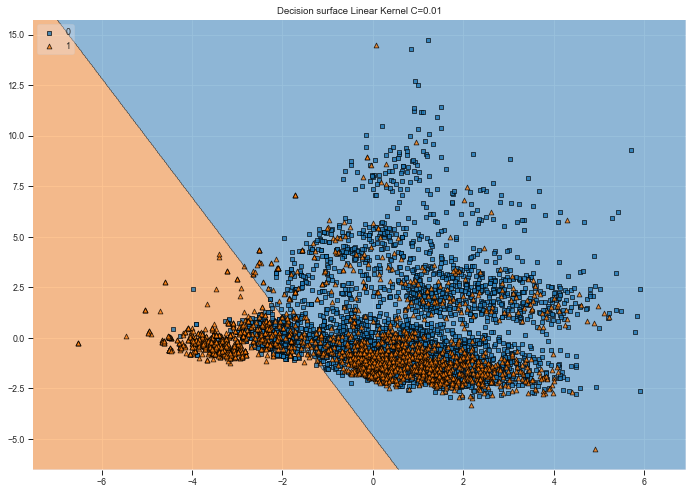

In [163]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf=sv, legend=2)
# title for the plots
plt.title('Decision surface Linear Kernel C=0.01')
plt.show()

### C=1

In [164]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='linear',probability=False,C=1) 
sv.fit(X_train, y_train)

Wall time: 4.16 s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [165]:
%%time
#Predict the response for train dataset
y_pred_train = sv.predict(X_train)
#Predict the response for test dataset
y_pred_test= sv.predict(X_test)

print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

--------------------accuracy score--------------
Wall time: 429 ms


0.6890909090909091

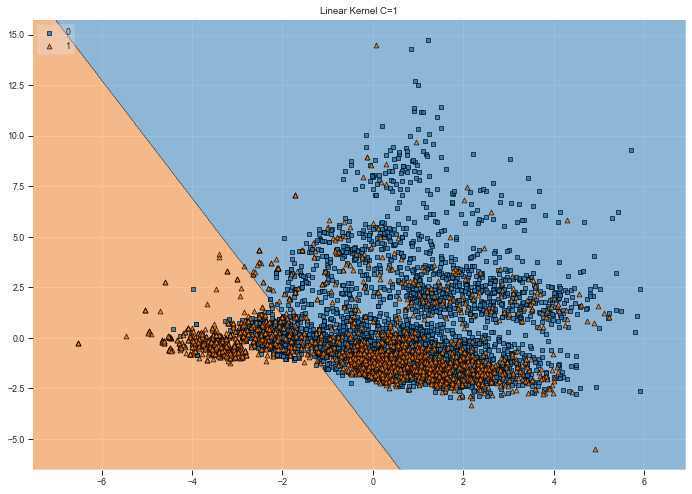

In [166]:
plot_decision_regions(X_train, y_train, clf=sv, legend=2)
plt.title('Linear Kernel C=1')
plt.show()

### C=10

In [167]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='linear',probability=False,C=10) 
sv.fit(X_train, y_train)

Wall time: 10.7 s


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
%%time
#Predict the response for train dataset
y_pred_train = sv.predict(X_train)
#Predict the response for test dataset
y_pred_test= sv.predict(X_test)

print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

--------------------accuracy score--------------
Wall time: 491 ms


0.6890909090909091

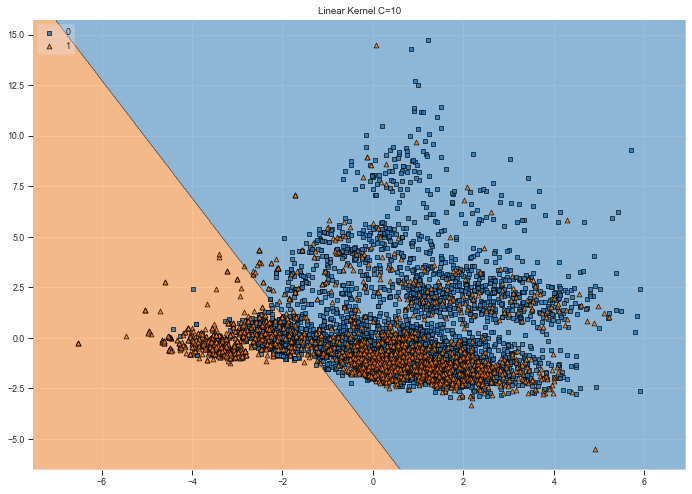

In [169]:
plot_decision_regions(X_train, y_train, clf=sv, legend=2)
plt.title('Linear Kernel C=10')
plt.show()

### C=0.01, kernel = 'rbf' at low value of gamma

In [170]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='rbf',probability=False,C=0.01,gamma=0.01) 
sv.fit(X_train, y_train)

Wall time: 1.74 s


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [171]:
%%time
#Predict the response for train dataset
y_pred_train = sv.predict(X_train)
#Predict the response for test dataset
y_pred_test= sv.predict(X_test)

print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

--------------------accuracy score--------------
Wall time: 1.37 s


0.6348484848484849

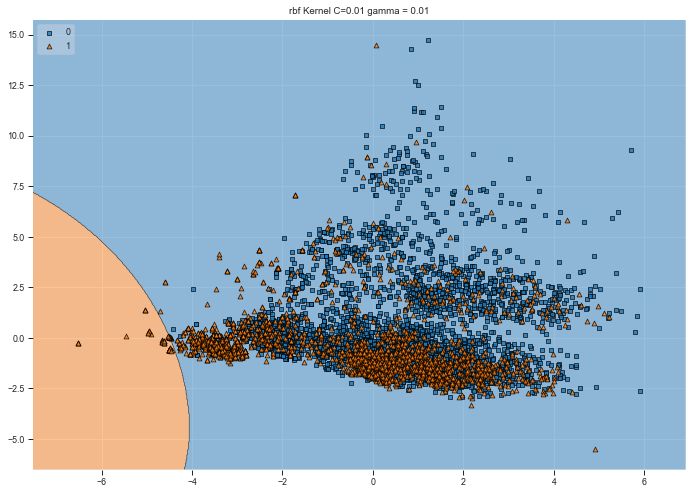

In [172]:
plot_decision_regions(X_train, y_train, clf=sv, legend=2)
plt.title('rbf Kernel C=0.01 gamma = 0.01')
plt.show()

### C=1, kernel = 'rbf' at low value of gamma

In [173]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='rbf',probability=False,C=1,gamma=0.01) 
sv.fit(X_train, y_train)

Wall time: 1.49 s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [174]:
%%time
#Predict the response for train dataset
y_pred_train = sv.predict(X_train)
#Predict the response for test dataset
y_pred_test= sv.predict(X_test)

print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

--------------------accuracy score--------------
Wall time: 1.08 s


0.7275757575757575

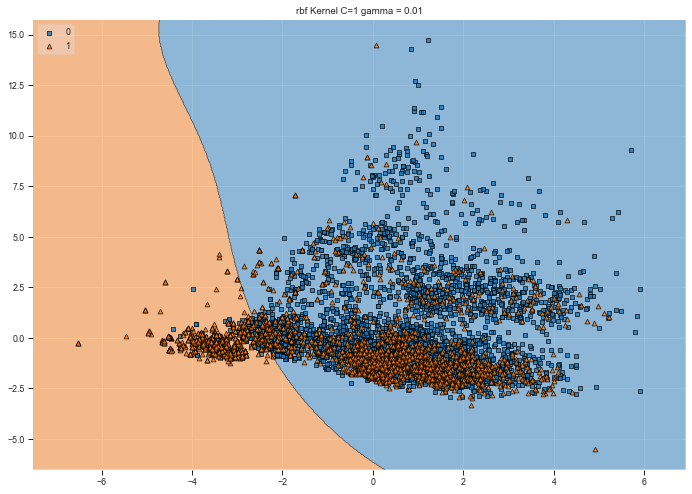

In [175]:
plot_decision_regions(X_train, y_train, clf=sv, legend=2)
plt.title('rbf Kernel C=1 gamma = 0.01')
plt.show()

### C=0.01, kernel = 'rbf', gamma at high gamma

In [176]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='rbf',probability=False,C=0.01,gamma=1) 
sv.fit(X_train, y_train)

Wall time: 1.58 s


SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [177]:
%%time
#Predict the response for train dataset
y_pred_train = sv.predict(X_train)
#Predict the response for test dataset
y_pred_test= sv.predict(X_test)

print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

--------------------accuracy score--------------
Wall time: 1.09 s


0.7233333333333334

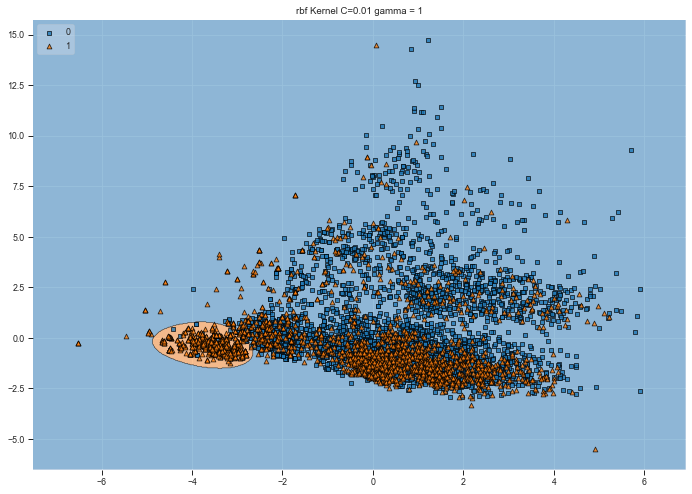

In [178]:
plot_decision_regions(X_train, y_train, clf=sv, legend=2)
plt.title('rbf Kernel C=0.01 gamma = 1')
plt.show()

### C=1, kernel = 'rbf', at high gamma

In [179]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='rbf',probability=False,C=1,gamma=1) 
sv.fit(X_train, y_train)

Wall time: 4.22 s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [180]:
%%time
#Predict the response for train dataset
y_pred_train = sv.predict(X_train)
#Predict the response for test dataset
y_pred_test= sv.predict(X_test)

print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

--------------------accuracy score--------------
Wall time: 1.28 s


0.7348484848484849

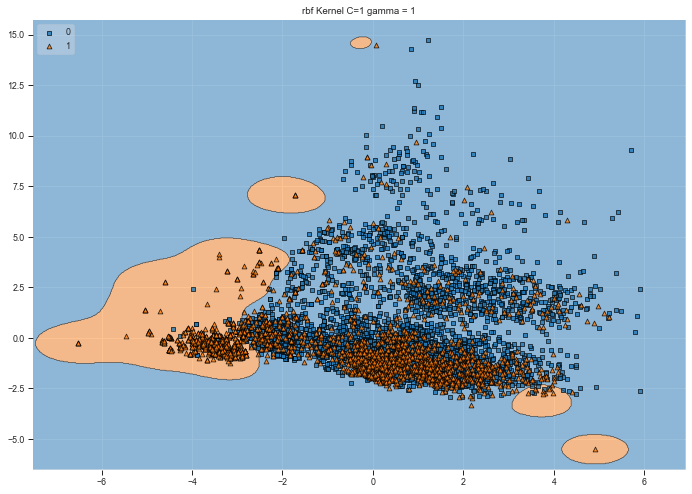

In [181]:
plot_decision_regions(X_train, y_train, clf=sv, legend=2)
plt.title('rbf Kernel C=1 gamma = 1')
plt.show()

### Modelling and Validation  SVM with all columns

In [182]:
X1 = X1_PCA.to_numpy()
randoms=np.random.choice(X1.shape[0], 10000, replace=False)
X1=X1[randoms]
X1.shape

(10000, 30)

In [183]:
y1=y[randoms]
y1.shape

(10000,)

In [184]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=RANDOM_SEED)

### kernel = 'linear'

In [185]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='linear',probability=False) 
sv.fit(X_train, y_train)

Wall time: 6.07 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [186]:
y_pred_test = sv.predict(X_test)


In [187]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.73      0.99      0.84      2109
           1       0.96      0.35      0.51      1191

    accuracy                           0.76      3300
   macro avg       0.85      0.67      0.68      3300
weighted avg       0.81      0.76      0.72      3300

--------------------accuracy score--------------


0.7606060606060606

### kernel = 'poly'

In [188]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='poly',probability=False) 
sv.fit(X_train, y_train)

Wall time: 3.02 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [189]:
y_pred_test = sv.predict(X_test)


In [190]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.75      0.97      0.84      2109
           1       0.87      0.42      0.57      1191

    accuracy                           0.77      3300
   macro avg       0.81      0.69      0.71      3300
weighted avg       0.79      0.77      0.74      3300

--------------------accuracy score--------------


0.7696969696969697

### kernel = 'rbf'

In [191]:
%%time
#Import svm model
from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='rbf',probability=False) 
sv.fit(X_train, y_train)

Wall time: 2.51 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [192]:
y_pred_test = sv.predict(X_test)


In [193]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.76      0.95      0.85      2109
           1       0.85      0.48      0.61      1191

    accuracy                           0.78      3300
   macro avg       0.81      0.72      0.73      3300
weighted avg       0.80      0.78      0.76      3300

--------------------accuracy score--------------


0.7821212121212121

### parameter Tuning

In [194]:
RANDOM_SEED = 30
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=RANDOM_SEED)


In [195]:
%%time
from sklearn.model_selection import cross_validate
# Let's first try a simple model to make a benchmark for our model performance
scoring = ['precision_macro','recall_macro','accuracy']
depth1 = pd.DataFrame(columns = ['test_accuracy','test_precision_macro','test_recall_macro','C','kernel','gamma'])
kernel = ['rbf','linear','poly'] 
C=[0.01,1] # for demo use less number of regularization 
gamma = [0.01,1]
for i in gamma:
    for k in kernel:
        for j in C:
            sv = svm.SVC(kernel=k,C=j,probability=False,gamma=i) 
            scores = cross_validate(estimator = sv,X=X_train, y=y_train,cv=3,scoring=scoring)
            a = pd.DataFrame(scores)
            a = a[['test_accuracy','test_precision_macro','test_recall_macro']]
            a['kernel']=k
            a['C']=j
            a['gamma'] = i
            depth1 = pd.concat([a,depth1],axis=0)
depth1[['gamma','kernel','C','test_accuracy','test_precision_macro','test_recall_macro']][depth1['test_accuracy'] ==depth1['test_accuracy'].max()] 



Wall time: 5min 42s


,gamma,kernel,C,test_accuracy,test_precision_macro,test_recall_macro
2,1.0,rbf,1.0,0.764442,0.782895,0.709492


In [196]:
# Create SVM classifer object
sv = svm.SVC(kernel='rbf',C=1,gamma =1 ,probability=False) 
# Fit the random search model
sv.fit(X_train,y_train)
y_pred_test = sv.predict(X_test)


In [197]:
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print( "confusion_matrix train data\n\n",confusion_matrix_test,"\n")
tn, fp, fn, tp = confusion_matrix_test.ravel()
print('true negative',tn)
print('false positive',fp)
print('false negative',fn)
print('true positive',tp)


confusion_matrix train data

 [[1971  138]
 [ 592  599]] 

true negative 1971
false positive 138
false negative 592
true positive 599


In [198]:
print( "Classification report train data\n\n" ,classification_report(y_test, y_pred_test))
#macro average (averaging the unweighted mean per label),
#weighted average (averaging the support-weighted mean     per label),
#binary classification, recall of the positive class
#is also known as "sensitivity"; recall of the negative class is"specificity".
print("--------------------accuracy score--------------")
accuracy_score(y_test, y_pred_test)

Classification report train data

               precision    recall  f1-score   support

           0       0.77      0.93      0.84      2109
           1       0.81      0.50      0.62      1191

    accuracy                           0.78      3300
   macro avg       0.79      0.72      0.73      3300
weighted avg       0.78      0.78      0.76      3300

--------------------accuracy score--------------


0.7787878787878788

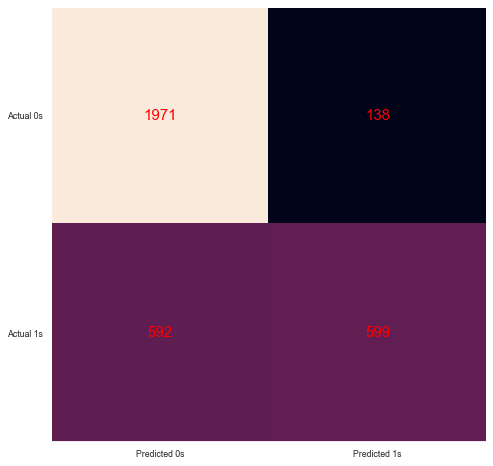

In [199]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix_test[i, j], ha='center', va='center', color='red', fontsize=15)
plt.show()

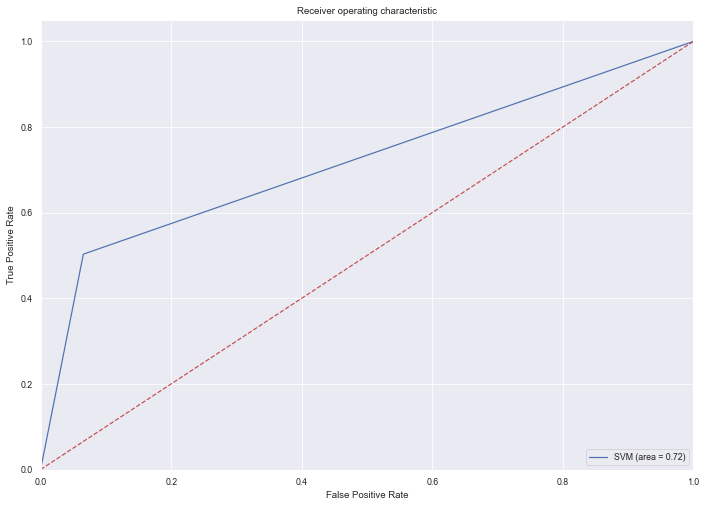

In [201]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()